# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df = df.drop(['petal length (cm)',
              'petal width (cm)'], axis=1)

In [ ]:
df.head(2)

sepal length (cm)  sepal width (cm)  target
0                5.1               3.5       0
1                4.9               3.0       0

# Separate Features and Labels

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Perform Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.unique()

array([0, 1, 2])

# Initiallize Gaussian Naive Bayes Model

In [ ]:
naive_bayes = GaussianNB()

# Fit on Train Data

In [ ]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

# Predict on Test Data

In [ ]:
y_pred = naive_bayes.predict(X_test)

# Model Evaluation

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)


# Library Results

In [ ]:
metrics_df

Metric     Value
0   Accuracy  0.900000
1  Precision  0.901389
2     Recall  0.900000
3   F1 Score  0.899233

# Custom implementation

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

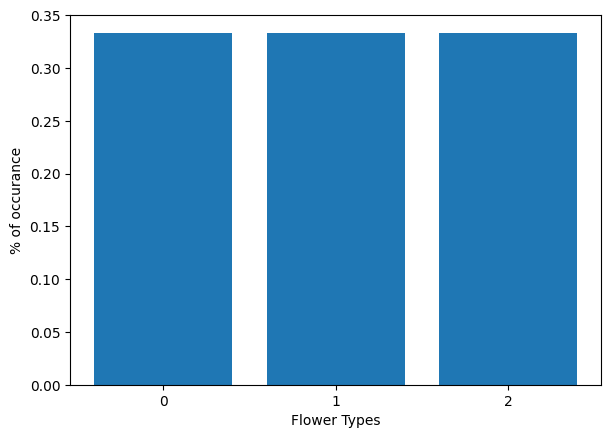

In [ ]:
iris = datasets.load_iris()

# For Simplicity let's consider only two features
X = iris.data[:, :2]
y = iris.target

N = X.shape[0]

# Do the Train and Validation Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Count the #of occurance of each flowers
c = Counter(y)
labels = np.array(list(c.keys()))
freq = np.array(list(c.values()))/N

#Plot the frequency histogram
fig1, ax = plt.subplots()
fig1.subplots_adjust(left=.16, bottom=.2, right=.99, top=.97)

plt.bar(labels, freq)
plt.xticks([0,1,2])
plt.xlabel('Flower Types')
plt.ylabel('% of occurance')
plt.show()

In [ ]:
class myNBClassifier(object):
    """Custom Naive Bayes Classifier"""
    def __init__(self):
        self.means = []
        self.stds =  []


    def myGaussian(self, x, mu, sig):
        """Gaussian function to compute likelihood"""
        lhd = 1/(sig * np.sqrt(2 * np.pi))*np.exp(- (x - mu )**2 / (2 * sig**2) )
        return lhd

    def fit(self, data, label):
        """Train our model with training data and labels given"""
        self.c = list(Counter(y).keys())
        dataset = np.column_stack((data, label))

        for g in self.c:
            segment = dataset[dataset[:,2]==g][:,:-1]
            f1, f2 = np.hsplit(segment,2)
            self.means.append([np.round(np.mean(f1),2),np.round(np.mean(f2),2)])
            self.stds.append([np.round(np.std(f1),2),np.round(np.std(f2),2)])


    def predict(self, data):
        """Predict the class for a given set of inputs"""
        fn =data.shape[1]
        mypred = []
        for row in data:
            likelihood = []
            for l in self.c:
                mus = self.means[l]
                sigs = self.stds[l]
                lkd = 0
                for i in range(fn):
                    lkd+=np.log(self.myGaussian(row[i], mus[i], sigs[i]))
                likelihood.append(lkd+np.log(1./len(self.c)))
            mypred.append(np.argmax(likelihood))

        return np.asarray(mypred)

In [ ]:
# Create an instance of our Classifier
myNB = myNBClassifier()

# Train with training data
myNB.fit(X_train, y_train)

# Predict class for test data
pred = myNB.predict(X_test)

Accuracy of our model: 90.0%


In [ ]:
test_cus_accuracy = accuracy_score(y_test, pred)
test_cus_precision = precision_score(y_test, pred, average='weighted')
test_cus_recall = recall_score(y_test, pred, average='weighted')
test_cus_f1 = f1_score(y_test, pred, average='weighted')

In [ ]:
cus_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_cus_accuracy, test_cus_precision, test_cus_recall, test_cus_f1]
}

metrics_cus_df = pd.DataFrame(cus_metrics)


In [ ]:
metrics_cus_df

Metric     Value
0   Accuracy  0.900000
1  Precision  0.901389
2     Recall  0.900000
3   F1 Score  0.899233

In [ ]:
metrics_df

Metric     Value
0   Accuracy  0.900000
1  Precision  0.901389
2     Recall  0.900000
3   F1 Score  0.899233

In [ ]:
metrics_df['Implementation'] = 'Library'
metrics_cus_df['Implementation'] = 'Manual'

combined_df = pd.concat([metrics_df, metrics_cus_df], ignore_index=True)
combined_df

Metric     Value Implementation
0   Accuracy  0.900000        Library
1  Precision  0.901389        Library
2     Recall  0.900000        Library
3   F1 Score  0.899233        Library
4   Accuracy  0.900000         Manual
5  Precision  0.901389         Manual
6     Recall  0.900000         Manual
7   F1 Score  0.899233         Manual